## TP4
### Question 1.2
On a intérêt à changer de porte. Cela nous proccure une probabilité de gain de 2/3 comparé à 1/3 dans le cas où l'on ne changerait pas.

### 2. Faisons le calcul
#### 1.

In [17]:
from random import randint
def games1000():
    win = 0
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            win+=1
    print(win)

games1000()

326


#### 2.

In [8]:
from random import randint
from random import choice

def games1000():
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            print(choice([i for i in range(0,3) if i not in [player_door]]))

games1000()

2
0
1
2
2
2
2
1
1
1
1
1
2
1
0
0
1
1
0
2
2
0
0
2
1
2
0
0
0
1
1
1
0
1
0
1
0
1
2
0
0
1
2
0
1
0
2
0
2
0
1
1
1
0
2
2
1
1
0
0
2
0
0
0
1
1
0
2
1
0
2
1
1
2
0
2
2
2
2
0
1
1
1
2
0
0
1
2
1
1
0
1
0
1
2
2
1
1
0
1
0
1
2
1
0
2
2
0
1
2
0
0
0
2
1
2
2
1
0
2
1
0
1
1
0
1
1
2
0
2
0
2
0
2
2
0
0
0
1
1
2
1
1
0
0
1
2
2
2
1
0
2
0
1
1
1
1
0
1
2
0
2
1
1
0
1
1
2
1
1
1
2
2
0
0
1
1
1
0
1
1
0
1
2
1
0
0
0
0
1
1
0
1
2
1
1
2
1
2
1
2
2
1
1
2
1
0
1
1
2
2
1
1
2
1
1
2
2
2
0
0
0
1
2
2
2
0
1
2
0
2
2
0
1
1
0
1
2
0
0
2
1
2
0
2
0
1
2
1
1
2
2
1
1
1
2
2
1
1
1
0
0
0
0
0
1
1
2
2
1
0
2
2
1
0
2
2
2
1
2
2
2
0
0
2
2
1
2
0
0
1
1
1
2
1
0
0
1
2
1
0
0
0
0
0
0
1
0
1
2
0
0
1
2
1
1
0
0
1
1
0
2
1
2
0
2
1
2
2


#### 3 et 4

In [19]:
from random import randint
from random import choice

def games1000(strat):
    win = 0
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            open_door = (choice([i for i in range(0,3) if i not in [player_door]]))
        else:
            open_door = choice([i for i in range(0,3) if i not in [player_door, winning_door]])
        if(strat==2):
            player_door = choice([i for i in range(0,3) if i not in [player_door, open_door]])
        if(winning_door==player_door):
                win+=1
    print('Strat {0} won {1} times /1000'.format(strat, win))     

games1000(1)
games1000(2)


Strat 1 won 330 times /1000
Strat 2 won 657 times /1000


## 3. Avec un ordinateur quantique


### 3.1 Mise en place de la voiture derrière la porte
Selon le circuit présenté, après le calcul des étais depuis psi0 jusqu'à l'état de sorti psi5, on arrive à la conclusion suivante :
- A psi0, tous nos qubits sont initialisés à |0>, on a donc un état |000>. 

- Ensuite, à psi 1 on a effectué une rotation sur le qubit 0 afin d'obtenir 1 chance sur 3 d'avoir le qubit 0 à 0 et 1 chance sur 3 de l'avoir à 1. Nous avons donc l'état suivant : sqrt(1/3) |000> + sqrt(2/3) |100>

- A psi 2 on a appliqué une porte hadamard conditionnelle sur le premier qubit, qui est placé en superposition |+> (1 chance sur 2 de mesurer 1) sur la probabilité que q0 serait mesuré à 1 (connu par la rotation), sinon q1 reste |0>, on obtenient donc : sqrt(1/3) |000> + sqrt(2/3 * 1/2) |100> + sqrt(2/3 * 1/2) |110>

- A psi 3 on applique un conditional not entre q1 et q2, cela implique la contrainte suivante : l'état mesuré doit être le même que q1, soit : sqrt(1/3) |000> + sqrt(1/3) |100> + sqrt(1/3) |111>

- A psi 4 on applique un cnot entre q0 et q1, cela inverse la valeur de q1 pour les états où q0 était 1 : sqrt(1/3) |000> + sqrt(1/3) |110> + sqrt(1/3) |101>

- A psi 5 on a appliqué un not sur q0 : sqrt(1/3) |100> + sqrt(1/3) |010> + sqrt(1/3) |001>

Ainsi, on se retrouve avec seulement 3 états possibles et équiprobables

### 3.2 Décision de Monty
Le joueur choisi toujours la porte 3 (ou 2 si on compte à partir de 0), dans le cas où le gain se trouve derrière la porte 0, alors Monty doit ouvrir la porte 1, on place donc une porte CX sur le qubit 0. 

Si le qubit 0 est à 1, alors la décision de monti sera d'ouvrir la porte 1 (la seconde). Dans le cas ou le gain est derrière la porte 1, alors la grâce à la porte CX monty ouvrira la porte 0.

Enfin, le dernier cas est celui où le gain se trouve derrière la porte 2, celle que le joueur à choisi.
Monty peut donc ouvrir l'une des deux premières. Pour cela on place une porte CH sur le troisième qubit, ce qui permet de couvrir toutes les possibilités dans le cas où le gain se trouve derrière la porte choisie par le joueur.

### 3.3 Quelle est la meilleure stratégie

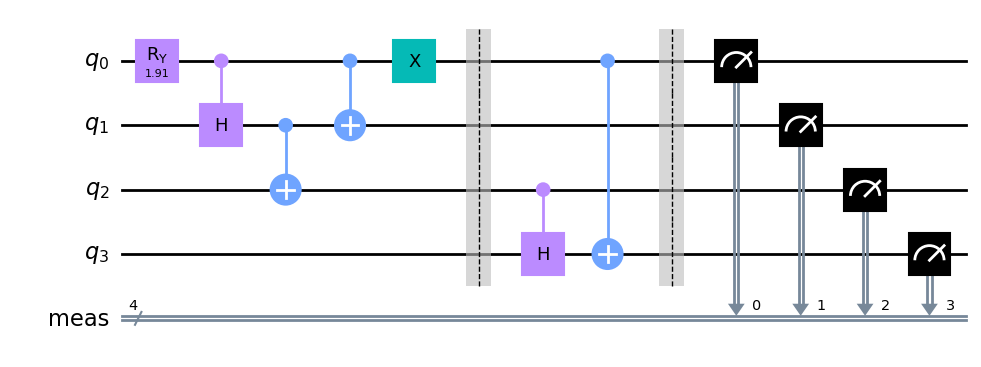

In [12]:
import numpy as np
from qiskit import assemble

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

pi = 3.14
circuit = QuantumCircuit(4, 0)
circuit.ry(pi/1.644,0)
circuit.ch(0,1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.x(0)
circuit.barrier()
circuit.ch(2,3)
circuit.cx(0,3)
circuit.measure_all()
circuit.draw('mpl')

/tmp/ipykernel_40082/3931819403.py:28: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


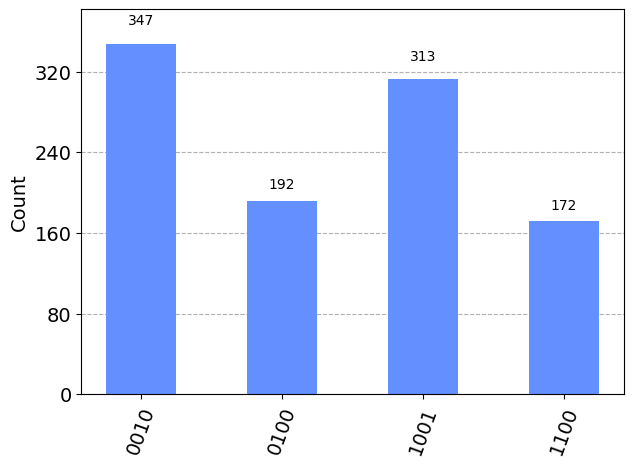

In [10]:
import numpy as np
from qiskit import assemble

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

pi = 3.14
circuit = QuantumCircuit(4, 0)
circuit.ry(pi/1.644,0)
circuit.ch(0,1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.x(0)
circuit.barrier()
circuit.ch(2,3)
circuit.cx(0,3)
circuit.barrier()
circuit.measure_all()
transpiled_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

#### Explicatione et identification de la solution
Le joueur choisi toujours la porte 2. Si la voiture ne se trouve pas derrière la porte 2, alors Monty me montre nécessairement une mauvaise porte. On peut donc déduire derrière quelle porte se trouve la voiture.

Les situations gagnantes lorsque le joueur choisi la porte 2 sont donc les suivantes:
- 1001 correspond à "La voiture est derrière la porte q0, Monty designe q1 donc je choisi q0
- 0010 correspond à la situation "La voiture est derrière la porte q1, Monty designe q0 donc je choisi q1"

Les situations perdantes sont lorsque la voiture se trouve derrière la seconde porte, soit :
- 0100 correspond à "La voiture est derrière q2, Monty désigne q0 donc je choisi q1"
- 1100 correspond à "La voiture est derrière q2, Monty désigne q1 donc je choisi q0"

En prennant les résultats de la simulation ci-dessus; on a:
Sur 1024 simulations, 
- 347+313 = 660 victoires
- 192+172 = 364 défaites
  
Soit un pourcentage de victoire de 64%
                    de défaite de 36%